<a href="https://colab.research.google.com/github/Zahu05/Drug-Response-Prediction/blob/main/Drug_Reponse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center>DRUG RESPONSE PREDICTION SYSTEM</h2><br>

<p>Can Take Drug: Binary variable indicating whether the patient can safely take the drug (1 for yes, 0 for no).</p>

In [ ]:
!jupyter nbconvert --to html /content/Copy_of_trial_pds.ipynb

[NbConvertApp] Converting notebook /content/Copy_of_trial_pds.ipynb to html
[NbConvertApp] Writing 1350843 bytes to /content/Copy_of_trial_pds.html


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data=pd.read_excel("drugs_and_patient_data2.xlsx")
data.columns
data = pd.DataFrame(data)
data.head(5)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,rx_otc,pregnancy_category,csa,alcohol,medical_condition_description,drug_link,Patient-ID,Age,Gender,Previous_Drug_Allergies,Drug_Composition,Can_take_drug
0,Truvada,AIDS/HIV,hives ; difficult breathing; swelling of your ...,emtricitabine and tenofovir disoproxil fumarate,Antiviral combinations,Rx,B,N,NaN,HIV Infection Other names: Acquired Immune Def...,https://www.drugs.com/truvada.html,1.0,23,Female,Patient reported no allergies,Contains emtricitabine and tenofovir disoproxi...,Yes
1,Biktarvy,AIDS/HIV,hives ; difficult breathing; swelling of your ...,"bictegravir, emtricitabine, and tenofovir",Antiviral combinations,Rx,NaN,N,NaN,HIV Infection Other names: Acquired Immune Def...,https://www.drugs.com/biktarvy.html,2.0,45,Male,Patient reported no allergies,"Contains bictegravir, emtricitabine, and tenof...",Yes
2,Triumeq,AIDS/HIV,Call your doctor at once if you have symptoms ...,"abacavir, dolutegravir, and lamivudine",Antiviral combinations,Rx,C,N,X,HIV Infection Other names: Acquired Immune Def...,https://www.drugs.com/triumeq.html,3.0,28,Female,Patient reported allergic reaction to penicillin,"Contains abacavir, dolutegravir, and lamivudine",Yes
3,Genvoya,AIDS/HIV,hives ; difficult breathing; swelling of your ...,"cobicistat, elvitegravir, emtricitabine, and t...",Antiviral combinations,Rx,B,N,NaN,HIV Infection Other names: Acquired Immune Def...,https://www.drugs.com/genvoya.html,4.0,22,Female,Patient reported no allergies,"Contains elvitegravir, cobicistat, emtricitabi...",Yes
4,Stribild,AIDS/HIV,hives ; difficult breathing; swelling of your ...,"cobicistat, elvitegravir, emtricitabine, and t...",Antiviral combinations,Rx,B,N,NaN,HIV Infection Other names: Acquired Immune Def...,https://www.drugs.com/stribild.html,5.0,24,Female,Patient reported no allergies,"Contains elvitegravir, cobicistat, emtricitab...",Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2319 non-null   object 
 1   medical_condition              2315 non-null   object 
 2   side_effects                   2292 non-null   object 
 3   generic_name                   2210 non-null   object 
 4   drug_classes                   2206 non-null   object 
 5   rx_otc                         2318 non-null   object 
 6   pregnancy_category             1560 non-null   object 
 7   csa                            2319 non-null   object 
 8   alcohol                        1230 non-null   object 
 9   medical_condition_description  2317 non-null   object 
 10  drug_link                      2319 non-null   object 
 11  Patient-ID                     2318 non-null   float64
 12  Age                            2319 non-null   i

<h2>Data Preprocessing Steps</h2>

In [ ]:
data.columns

Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'rx_otc', 'pregnancy_category', 'csa', 'alcohol',
       'medical_condition_description', 'drug_link', 'Patient-ID', 'Age',
       'Gender', 'Previous_Drug_Allergies', 'Drug_Composition',
       'Can_take_drug'],
      dtype='object')

<h2>1.TO HANDLE THE MISSING VALUES</h2>


In [ ]:
#1.TO HANDLE THE MISSING VALUES AND DROP THE UNECESSARY COLUMNS
import pandas as pd
from sklearn.experimental import enable_iterative_imputer #allows enabling experimental features related to the IterativeImputer class in scikit-learn.
from sklearn.impute import IterativeImputer # for imputing missing values in datasets by modeling each feature with missing values as a function of other features and then estimating the missing values iteratively.
from sklearn.preprocessing import OneHotEncoder #used to encode categorical features into a one-hot numeric array.

# to handle missing values for numerical and categorical data
numerical_data = ['Age']  # numerical column
categorical_data = ['Gender', 'alcohol', 'rx_otc', 'pregnancy_category']
df= pd.DataFrame(numerical_data)
print(df.info)
# applying iterative imputer to numerical column
imputer_numerical = IterativeImputer()
data[numerical_data] = imputer_numerical.fit_transform(data[numerical_data])
print(df.info)

# applying one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
data_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_data]))
# manually getting feature names
feature_names = encoder.get_feature_names_out(categorical_data)
data_encoded.columns = feature_names

# applying iterative imputer after encoding using one-hot encoder
imputer_categorical = IterativeImputer()
data_encoded_categorical = pd.DataFrame(imputer_categorical.fit_transform(data_encoded))
data_encoded_categorical.columns = data_encoded.columns

# now merging categorical column with numerical column
data_final = pd.concat([data[numerical_data], data_encoded_categorical], axis=1)

# displaying data
print(data_final.head())


<bound method DataFrame.info of      0
0  Age>
<bound method DataFrame.info of      0
0  Age>
    Age  Gender_Female  Gender_Male  alcohol_X  alcohol_nan  rx_otc_OTC  \
0  23.0            1.0          0.0        0.0          1.0         0.0   
1  45.0            0.0          1.0        0.0          1.0         0.0   
2  28.0            1.0          0.0        1.0          0.0         0.0   
3  22.0            1.0          0.0        0.0          1.0         0.0   
4  24.0            1.0          0.0        0.0          1.0         0.0   

   rx_otc_Rx  rx_otc_Rx/OTC  rx_otc_nan  pregnancy_category_A  \
0        1.0            0.0         0.0                   0.0   
1        1.0            0.0         0.0                   0.0   
2        1.0            0.0         0.0                   0.0   
3        1.0            0.0         0.0                   0.0   
4        1.0            0.0         0.0                   0.0   

   pregnancy_category_B  pregnancy_category_C  pregnancy_categor

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<h2>Fill null drug value with can't take drug as 'No'</h2>

In [ ]:
import pandas as pd

# Fill NaN values in 'Can_take_drug' column with 'No' and convert to categorical format
data['Can_take_drug'] = data['Can_take_drug'].fillna('No').astype('category')

# Verify unique values after handling NaN
unique_values_can_take_drug = data['Can_take_drug'].cat.categories
print("Unique values for Can_take_drug after handling NaN:", unique_values_can_take_drug)


Unique values for Can_take_drug after handling NaN: Index(['No', 'Yes', 'yes'], dtype='object')


<h2>2.Drop unnecessary columns



In [ ]:
# dropping cols to avoid misplaced data
import pandas as pd
# Drop rows where 'Can_take_drug' is 'Yes'
data['Can_take_drug'] = data['Can_take_drug'].replace('yes', 'Yes')

# Verify unique values after handling NaN
unique_values_can_take_drug = data['Can_take_drug'].cat.categories
print("Unique values for Can_take_drug after handling NaN:", unique_values_can_take_drug)

Unique values for Can_take_drug after handling NaN: Index(['No', 'Yes'], dtype='object')


<h2>3.Removing Duplicate rows from the dataset</h2>

In [ ]:
import pandas as pd
# Assuming df is your DataFrame
duplicate_rows = data.duplicated()
# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 223


In [ ]:
# Remove duplicate rows from the original DataFrame
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2096 entries, 0 to 2318
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   drug_name                      2096 non-null   object  
 1   medical_condition              2092 non-null   object  
 2   side_effects                   2072 non-null   object  
 3   generic_name                   1998 non-null   object  
 4   drug_classes                   1994 non-null   object  
 5   rx_otc                         2095 non-null   object  
 6   pregnancy_category             1415 non-null   object  
 7   csa                            2096 non-null   object  
 8   alcohol                        1136 non-null   object  
 9   medical_condition_description  2094 non-null   object  
 10  drug_link                      2096 non-null   object  
 11  Patient-ID                     2095 non-null   float64 
 12  Age                            2096 non

<h2>4.Faulty Male</h2>


In [ ]:
male_faulty = data[(data['Gender']=='Male') & (data['pregnancy_category'].isin(['B', 'C', 'D', 'A', 'X']))]
print(male_faulty)
data.loc[male_faulty.index, 'pregnancy_category'] = ''
print(data[(data['Gender']=='Male') & (data['pregnancy_category'].isin(['B', 'C', 'D', 'A', 'X']))])


     drug_name  medical_condition  \
178   Basaglar  Diabetes (Type 1)   
490   Basaglar  Diabetes (Type 1)   
802   Basaglar  Diabetes (Type 1)   
1114  Basaglar  Diabetes (Type 1)   
1328  Basaglar  Diabetes (Type 1)   
1638  Basaglar  Diabetes (Type 1)   
1950  Basaglar  Diabetes (Type 1)   

                                           side_effects      generic_name  \
178   redness or swelling where an injection was giv...  insulin glargine   
490   redness or swelling where an injection was giv...  insulin glargine   
802   redness or swelling where an injection was giv...  insulin glargine   
1114  redness or swelling where an injection was giv...  insulin glargine   
1328  redness or swelling where an injection was giv...  insulin glargine   
1638  redness or swelling where an injection was giv...  insulin glargine   
1950  redness or swelling where an injection was giv...  insulin glargine   

     drug_classes rx_otc pregnancy_category csa alcohol  \
178       Insulin     Rx   

<h2>5.Faulty Female</h2>


In [ ]:
female_below_18 = data[(data['Gender'] == 'Female') &
                       (data['Age'] < 18) &
                       (data['pregnancy_category'].notna()) &
                       (data['pregnancy_category'] != ' ')]

print(female_below_18)

data.loc[female_below_18.index, 'pregnancy_category'] = ''


                      drug_name  medical_condition  \
164                     Humalog  Diabetes (Type 1)   
165                      Lantus  Diabetes (Type 1)   
166                     Novolog  Diabetes (Type 1)   
167              insulin lispro  Diabetes (Type 1)   
168              insulin aspart  Diabetes (Type 1)   
...                         ...                ...   
1987              SymlinPen 120  Diabetes (Type 1)   
1988  Humalog Mix 50/50 KwikPen  Diabetes (Type 1)   
1989              Humulin 50/50  Diabetes (Type 1)   
1990          Humulin 70/30 Pen  Diabetes (Type 1)   
1991       ReliOn/Novolin 70/30  Diabetes (Type 1)   

                                           side_effects  \
164   redness or swelling where an injection was giv...   
165   redness or swelling where an injection was giv...   
166   redness or swelling where an injection was giv...   
167   redness or swelling where an injection was giv...   
168   redness or swelling where an injection was giv... 

<h2>6.Drop NAN value</h2>


In [ ]:
for column in data[['pregnancy_category', 'Gender', 'Can_take_drug']]:
  columnseriesobj = data[column]
  print('Unique values for', column,':', columnseriesobj.unique())

Unique values for pregnancy_category : ['B' nan 'C' 'D' 'A' '' 'N']
Unique values for Gender : ['Female' 'Male']
Unique values for Can_take_drug : ['Yes', 'No']
Categories (2, object): ['No', 'Yes']


In [ ]:
data['pregnancy_category'] = data['pregnancy_category'].fillna('')


In [ ]:
print(data['pregnancy_category'].unique())

['B' '' 'C' 'D' 'A' 'N']


<h2>7.Normalization=MinMax Scaler of Age Attribute</h2>


In [ ]:
import pandas as pd
# Calculate the minimum and maximum values of the Age column
age_min = data['Age'].min()
age_max = data['Age'].max()
# Apply Min-Max Scaling to normalize the Age column
data['Age_normalized'] = (data['Age'] - age_min) / (age_max - age_min)
# Display the normalized Age column
print(data['Age_normalized'])


0       0.252747
1       0.494505
2       0.307692
3       0.241758
4       0.263736
          ...   
2223    0.648352
2312    0.197802
2313    0.252747
2316    0.351648
2318    0.406593
Name: Age_normalized, Length: 2096, dtype: float64


# <h2>8.Removing Stop words</h2>

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')  # Download necessary tokenizer models
nltk.download('stopwords')  # Download stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming 'text_column' is the column containing the text data
text_data = data['Previous_Drug_Allergies']


# Tokenize and remove stop words for each text in the dataset
filtered_texts = []

for text in text_data:
    # Tokenize the text
    tokens = word_tokenize(str(text))  # Ensure text is converted to string

    # Remove stop words
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')] # words like the is something that common in sentances are removed. ex:this is care then this and is removed only care is filtered.

    # Join the filtered tokens back into a string
    filtered_text = ' '.join(filtered_tokens)

    # Append the filtered text to the list
    filtered_texts.append(filtered_text)

# Replace the original text column with the filtered text
data['filtered_text'] = filtered_texts

# Display the DataFrame with filtered text
print(data['filtered_text'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                          Patient reported allergies
1                          Patient reported allergies
2       Patient reported allergic reaction penicillin
3                          Patient reported allergies
4                          Patient reported allergies
                            ...                      
2223           Patient allergic Trizivir Epivir-HBV .
2312         Patient allergic Bamlanivimab Etesevimab
2313                       Patient reported allergies
2316                       Patient reported allergies
2318                       Patient reported allergies
Name: filtered_text, Length: 2096, dtype: object


<h2>9.Removing commas and full stops</h2>


In [ ]:
import pandas as pd
text_columns = ['Previous_Drug_Allergies', 'Drug_Composition']
# Remove commas and full stops from each text in the specified columns
for column in text_columns:
    data[column] = data[column].str.replace('[,.]', '', regex=True)

# Display the updated DataFrame
print(data)


                                              drug_name medical_condition  \
0                                               Truvada          AIDS/HIV   
1                                              Biktarvy          AIDS/HIV   
2                                               Triumeq          AIDS/HIV   
3                                               Genvoya          AIDS/HIV   
4                                              Stribild          AIDS/HIV   
...                                                 ...               ...   
2223                              lopinavir / ritonavir          AIDS/HIV   
2312                        bamlanivimab and etesevimab               NaN   
2313                                        baricitinib          Covid 19   
2316                           nirmatrelvir / ritonavir          Covid 19   
2318  Pfizer-BioNTech COVID-19 (5y-11y) Bivalent Boo...          Covid 19   

                                           side_effects  \
0     hives ; di

<h2>10.Performing lemmatization- it considers the context of the word and its part of speech (POS).</h2>

In [ ]:
import nltk
nltk.download('wordnet')
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
text_lemmetizer = ['Previous_Drug_Allergies', 'Drug_Composition']

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Perform lemmatization for each text in the specified columns
for column in text_lemmetizer:
    # Lemmatization function
    def lemmatize_text(text):
        tokens = word_tokenize(str(text))  # Tokenize the text
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Perform lemmatization
        return ' '.join(lemmatized_tokens)  # Join the lemmatized tokens back into a string

    # Apply lemmatization to the column
    data[column] = data[column].apply(lemmatize_text)

# Display the updated DataFrame
print(data[column])


[nltk_data] Downloading package wordnet to /root/nltk_data...


0       Contains emtricitabine and tenofovir disoproxi...
1       Contains bictegravir emtricitabine and tenofov...
2           Contains abacavir dolutegravir and lamivudine
3       Contains elvitegravir cobicistat emtricitabine...
4       Contains elvitegravir cobicistat emtricitabine...
                              ...                        
2223    Contains lamivudine and tenofovir disoproxil f...
2312                 Contains Bamlanivimab and Etesevimab
2313                                 Contains Baricitinib
2316                  Contains Nirmatrelvir and Ritonavir
2318    Contains mRNA encoding the spike protein of SA...
Name: Drug_Composition, Length: 2096, dtype: object


<h1>******Descriptive Statistical Analysis**********</h1>
<img src=https://www.scribbr.de/wp-content/uploads/2023/01/Descriptive-statistics.webp </img>


<h2>Frequency Distribution </h2>




Frequency of Drug Compositions and Predicted Drug Responses:


Can_take_drug,No,Yes
Drug_Composition,,
Conains insulin glargine,7,0
Conains insulin isophane and insulin regular,19,2
Conains insulin lispro and insulin lispro protamine,7,0
Conains pramlintide,0,21
Conatins lixisenatide,6,1
...,...,...
contains Lopinavir Ritonavir,6,0
contains Ritonavir,0,6
contains Tenofovir,0,6





Frequency of Previous Drug Allergies and Predicted Drug Responses:


Can_take_drug,No,Yes
Previous_Drug_Allergies,,
Allergic reaction to Abacavir,6,0
Allergic reaction to Atazanavir,6,0
Allergic reaction to Doravirine,6,0
Allergic reaction to Efavirenz,6,0
Allergic reaction to Maraviroc,6,0
...,...,...
Patient reported no allergy,183,770
allergic to etravirine,6,0
allergic to ritonavir,6,0


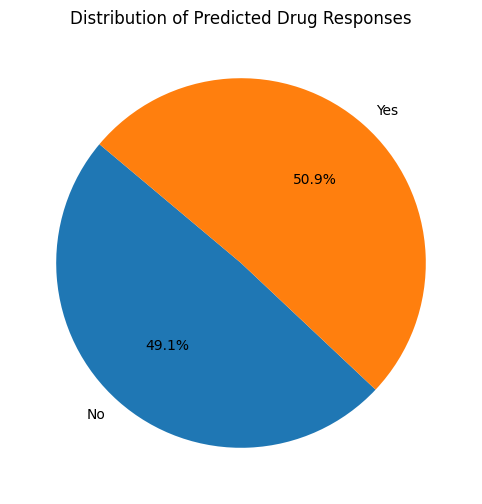

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("\n\n")
import pandas as pd

# Combine drug composition with predicted drug responses
composition_response_counts = data.groupby(['Drug_Composition', 'Can_take_drug']).size().unstack(fill_value=0)
print("Frequency of Drug Compositions and Predicted Drug Responses:")
display(composition_response_counts)

print("\n\n")

# Combine previous drug allergies with predicted drug responses
allergy_response_counts = data.groupby(['Previous_Drug_Allergies', 'Can_take_drug']).size().unstack(fill_value=0)
print("Frequency of Previous Drug Allergies and Predicted Drug Responses:")
display(allergy_response_counts)


print("\n\n")
# Visualizations
# Pie chart of Predicted Drug Responses
plt.figure(figsize=(8, 6))
plt.pie(composition_response_counts.sum(), labels=composition_response_counts.columns, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predicted Drug Responses')
plt.show()




<h4>Encoding categorical variables and then calculating the
mode</h4>

In [ ]:

# Specify the columns you want to analyze
columns_to_analyze = ['Previous_Drug_Allergies', 'Drug_Composition', 'Can_take_drug']

# Calculate mode for each column
mode_values = {}
for col in columns_to_analyze:
    mode_values[col] = data[col].mode()[0]  # mode() can return multiple values, so we take the first one

# Create a DataFrame to display the mode values
mode_df = pd.DataFrame({'Mode': mode_values})

# Display the mode values
print("Mode Values for Specified Columns:")
display(mode_df)

Mode Values for Specified Columns:


,Mode
Can_take_drug,Yes
Drug_Composition,Contains mRNA encoding the spike protein of SA...
Previous_Drug_Allergies,Patient reported no allergies


Mode Values for Specified Columns:


,Mode
Can_take_drug,1
Drug_Composition,180
Previous_Drug_Allergies,100


<Figure size 1000x600 with 0 Axes>

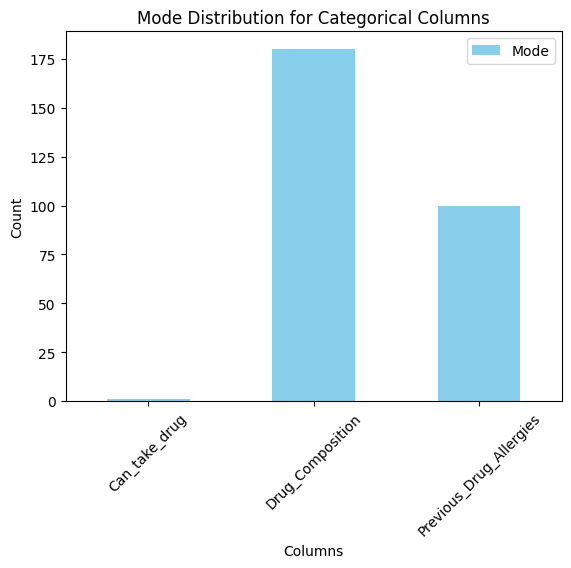

from matplotlib import pyplot as plt
mode_df['Mode'].plot(kind='hist', bins=20, title='Mode')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
mode_df['Mode'].plot(kind='line', figsize=(8, 4), title='Mode')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
encoded_data = data.copy()
categorical_columns = ['Previous_Drug_Allergies', 'Drug_Composition', 'Can_take_drug']
for col in categorical_columns:
    encoded_data[col] = label_encoder.fit_transform(data[col])

# Specify the columns you want to analyze
columns_to_analyze = ['Previous_Drug_Allergies', 'Drug_Composition', 'Can_take_drug']

# Calculate mode for each column
mode_values = {}
for col in columns_to_analyze:
    mode_values[col] = encoded_data[col].mode()[0]  # mode() can return multiple values, so we take the first one

# Create a DataFrame to display the mode values
mode_df = pd.DataFrame({'Mode': mode_values})

# Display the mode values
print("Mode Values for Specified Columns:")
display(mode_df)

# Plot the mode values
plt.figure(figsize=(10, 6))
mode_df.plot(kind='bar', color='skyblue')
plt.title("Mode Distribution for Categorical Columns")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
''' both results say that a patient's ability to take a specific drug is closely tied to their history of drug allergies and the composition of the drug itself.
If they have a lot of allergies or if the drug has certain ingredients, it's more likely they won't be able to take it.'''
'''Higher values of the chi-square statistic indicate a greater difference between observed and expected counts,
suggesting a stronger association between the variables.'''
import pandas as pd
from scipy.stats import chi2_contingency

# Specify the columns you want to analyze
categorical_columns = ['drug_name', 'medical_condition', 'side_effects', 'generic_name',
                       'drug_classes', 'rx_otc', 'pregnancy_category', 'csa', 'alcohol',
                       'medical_condition_description', 'Drug_Composition', 'Previous_Drug_Allergies']

# Initialize dictionaries to store results
chi2_values = {}
p_values = {}

# Perform chi-square test for each categorical column
for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data['Can_take_drug'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_values[col] = chi2
    p_values[col] = p

# Print results
print("Chi-square test results for each categorical column and Can Take Drug or Not:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(f"Chi-square statistic: {chi2_values[col]}")
    print(f"P-value: {p_values[col]}")



Chi-square test results for each categorical column and Can Take Drug or Not:

Column: drug_name
Chi-square statistic: 4562.1135829120585
P-value: 0.0

Column: medical_condition
Chi-square statistic: 53.923809564781195
P-value: 5.013411398638783e-08

Column: side_effects
Chi-square statistic: 4508.105514733412
P-value: 0.0

Column: generic_name
Chi-square statistic: 3362.218261258763
P-value: 0.0

Column: drug_classes
Chi-square statistic: 455.4504092810986
P-value: 7.10966998255704e-58

Column: rx_otc
Chi-square statistic: 7.961934334170148
P-value: 0.09298258284108775

Column: pregnancy_category
Chi-square statistic: 83.37807255055863
P-value: 1.019072061195983e-14

Column: csa
Chi-square statistic: 32.49491281744571
P-value: 8.786569260533561e-08

Column: alcohol
Chi-square statistic: 0.0
P-value: 1.0

Column: medical_condition_description
Chi-square statistic: 53.51829674754369
P-value: 5.964842948440881e-08

Column: Drug_Composition
Chi-square statistic: 3825.6722947612534
P-value

# <h2>4. Feature Extraction based on correlation, covariance</h2>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset here, assuming it's named 'data'

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Replace non-numeric values in all columns with NaN
data.replace(['Yes', 'No'], [1, 0], inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Fill NaN values in 'Can_take_drug' column with 0
data['Can_take_drug'].fillna(0, inplace=True)

# Calculate correlation matrix
correlation_matrix = data.corr()

# Calculate covariance matrix
covariance_matrix = data.cov()

# Print correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Print covariance matrix
print("\nCovariance Matrix:")
display(covariance_matrix)


Correlation Matrix:


,drug_name,medical_condition,side_effects,generic_name,drug_classes,rx_otc,pregnancy_category,csa,alcohol,medical_condition_description,drug_link,Patient-ID,Age,Gender,Previous_Drug_Allergies,Drug_Composition,Can_take_drug,Age_normalized,filtered_text
drug_name,1.000000,-0.110420,-0.031770,0.168678,0.075302,0.146519,-0.041665,0.051733,0.161205,-0.150362,0.330816,-0.006023,0.061989,0.143038,0.049335,0.120121,0.013795,0.061989,0.049251
medical_condition,-0.110420,1.000000,0.118435,0.136288,-0.124298,-0.149370,0.025639,-0.025721,-0.782179,-0.146260,-0.063704,0.160004,-0.225763,-0.180364,0.014662,0.052321,-0.003318,-0.225763,0.013480
side_effects,-0.031770,0.118435,1.000000,0.154226,-0.077267,-0.140218,-0.060313,0.022706,-0.156829,0.076763,0.195035,0.013703,-0.173775,-0.242086,-0.067672,-0.056060,-0.001977,-0.173775,-0.067686
generic_name,0.168678,0.136288,0.154226,1.000000,0.170825,-0.012946,-0.083891,0.183585,-0.066070,-0.041803,0.147286,0.014089,-0.110676,-0.083593,-0.023312,0.057346,0.027097,-0.110676,-0.023484
drug_classes,0.075302,-0.124298,-0.077267,0.170825,1.000000,-0.008160,-0.103284,0.212972,0.263169,-0.090731,-0.077044,-0.025827,-0.033903,0.154129,0.073578,0.140903,0.027119,-0.033903,0.073637
rx_otc,0.146519,-0.149370,-0.140218,-0.012946,-0.008160,1.000000,0.048451,0.023511,0.095320,0.031862,0.001441,-0.030037,0.230778,0.114890,0.029323,0.095437,-0.004673,0.230778,0.029487
pregnancy_category,-0.041665,0.025639,-0.060313,-0.083891,-0.103284,0.048451,1.000000,-0.109500,-0.019073,0.138612,-0.054519,0.008720,0.076857,-0.535092,0.080209,0.080943,-0.137336,0.076857,0.080266
csa,0.051733,-0.025721,0.022706,0.183585,0.212972,0.023511,-0.109500,1.000000,0.128849,-0.110616,0.070831,-0.002152,0.028216,0.204638,-0.117838,-0.111023,-0.120616,0.028216,-0.117850
alcohol,0.161205,-0.782179,-0.156829,-0.066070,0.263169,0.095320,-0.019073,0.128849,1.000000,-0.117168,0.023991,-0.117472,0.232229,0.293934,-0.020905,0.001352,0.013979,0.232229,-0.019848
medical_condition_description,-0.150362,-0.146260,0.076763,-0.041803,-0.090731,0.031862,0.138612,-0.110616,-0.117168,1.000000,0.024016,-0.044229,0.156155,-0.260246,-0.023216,0.220980,-0.069185,0.156155,-0.022299



Covariance Matrix:


,drug_name,medical_condition,side_effects,generic_name,drug_classes,rx_otc,pregnancy_category,csa,alcohol,medical_condition_description,drug_link,Patient-ID,Age,Gender,Previous_Drug_Allergies,Drug_Composition,Can_take_drug,Age_normalized,filtered_text
drug_name,8165.209634,-21.201767,-258.964306,738.937299,69.285871,3.055782,-5.708047,0.546171,7.259367,-22.263004,2691.134632,-327.887996,99.046825,5.605192,133.522086,675.786085,0.623313,1.088427,133.411507
medical_condition,-21.201767,4.515207,22.701678,14.039877,-2.689397,-0.073257,0.082598,-0.006386,-0.828290,-0.509242,-12.186176,204.825996,-8.482680,-0.166205,0.933116,6.921839,-0.003525,-0.093216,0.858675
side_effects,-258.964306,22.701678,8137.256353,674.471707,-70.971621,-2.919372,-8.248640,0.239307,-7.050196,11.346316,1583.859178,744.200730,-277.183689,-9.470296,-182.838293,-314.844462,-0.089168,-3.045975,-183.032599
generic_name,738.937299,14.039877,674.471707,2350.344269,84.327639,-0.144860,-6.166113,1.039881,-1.596272,-3.320751,642.822285,411.307996,-94.876445,-1.757483,-33.850263,173.092824,0.656892,-1.042598,-34.129893
drug_classes,69.285871,-2.689397,-70.971621,84.327639,103.682772,-0.019177,-1.594468,0.253372,1.335444,-1.513805,-70.624497,-158.402891,-6.104222,0.680600,22.439856,89.326332,0.138078,-0.067079,22.477200
rx_otc,3.055782,-0.073257,-2.919372,-0.144860,-0.019177,0.053271,0.016954,0.000634,0.010964,0.012050,0.029933,-4.176560,0.941850,0.011500,0.202707,1.371415,-0.000539,0.010350,0.204019
pregnancy_category,-5.708047,0.082598,-8.248640,-6.166113,-1.594468,0.016954,2.298595,-0.019397,-0.014411,0.344344,-7.441200,7.962681,2.060428,-0.351815,3.642279,7.640437,-0.104116,0.022642,3.647971
csa,0.546171,-0.006386,0.239307,1.039881,0.253372,0.000634,-0.019397,0.013651,0.007502,-0.021177,0.745020,-0.151505,0.058293,0.010369,-0.412368,-0.807609,-0.007047,0.000641,-0.412764
alcohol,7.259367,-0.828290,-7.050196,-1.596272,1.335444,0.010964,-0.014411,0.007502,0.248356,-0.095677,1.076325,-35.259307,2.046417,0.063525,-0.312037,0.041936,0.003483,0.022488,-0.296515
medical_condition_description,-22.263004,-0.509242,11.346316,-3.320751,-1.513805,0.012050,0.344344,-0.021177,-0.095677,2.684865,3.542622,-43.614781,4.524366,-0.184927,-1.139384,22.543513,-0.056686,0.049718,-1.095304


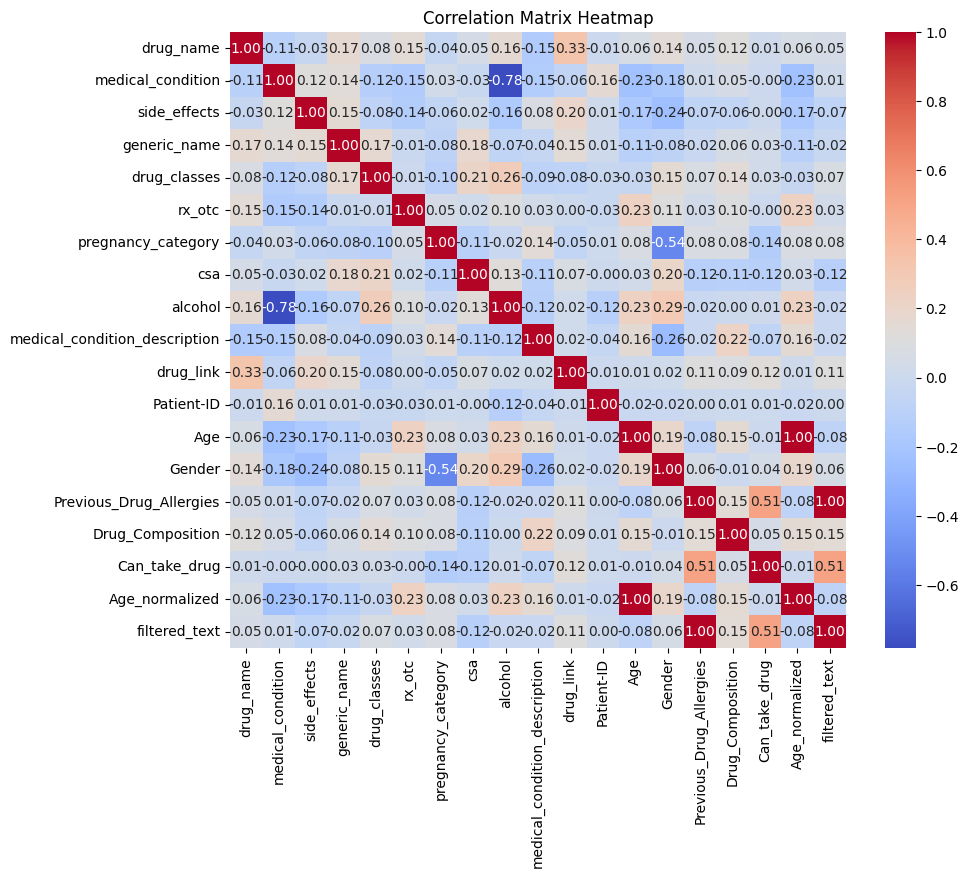

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Calculate correlation matrix
correlation_matrix = data.corr()
covariance_matrix = data.cov()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


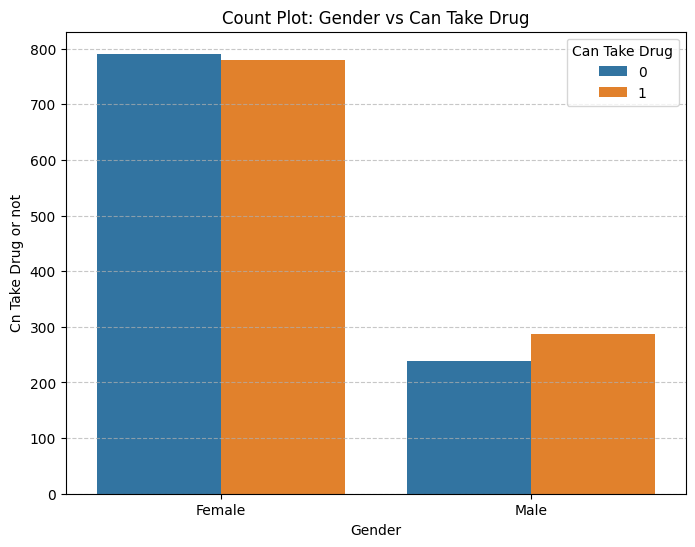

In [ ]:

# Create count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Can_take_drug', data=data)
plt.title('Count Plot: Gender vs Can Take Drug')
plt.xlabel('Gender')
plt.ylabel('Cn Take Drug or not')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Set x-axis ticks to original labels
plt.legend(title='Can Take Drug')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


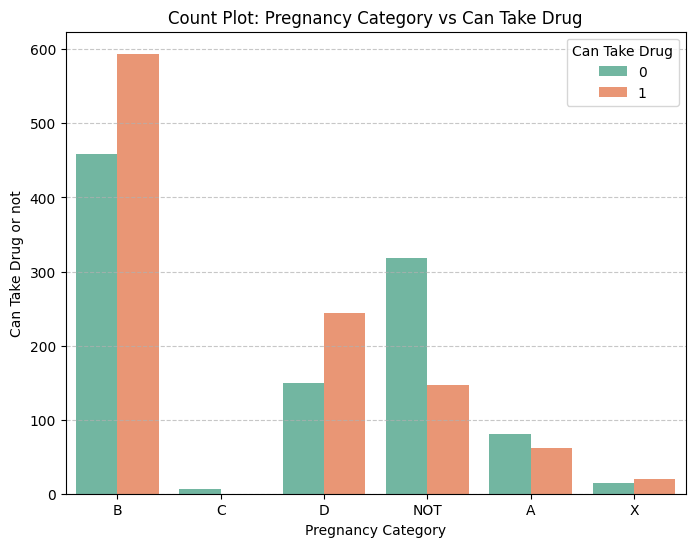

In [ ]:

# Create count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='pregnancy_category', hue='Can_take_drug', data=data,palette="Set2")
plt.title('Count Plot: Pregnancy Category vs Can Take Drug')
plt.xlabel('Pregnancy Category')
plt.ylabel('Can Take Drug or not')
plt.xticks(ticks=[0,1,2,3,4,5],labels=['B','C','D','NOT','A','X'])  # Set x-axis ticks to original labels
plt.legend(title='Can Take Drug')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h2>5.Model Creation<br>
Model-1 : Logistic Regression</h2>


In [ ]:
'''Macro average gives us the average precision, recall, and F1-score
across all classes (spam and non-spam), without considering class imbalance.
 It provides an overall view of the model's performance.
 Weighted average considers class imbalance by weighting the average metrics based on the support of each class.
 F1-score is a balance between precision and recall. It gives us an overall measure of the spam filter's performance.
 If the F1-score for spam emails is 0.70, it means our model achieves a good balance between correctly identifying spam
 emails (precision) and not missing any spam emails (recall).'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Check for missing values
print("Missing values before preprocessing:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Separate features (X) and target variable (y)
X = data[['Previous_Drug_Allergies', 'Drug_Composition']]
y = data['Can_take_drug']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\n\n")
print(f"Accuracy: {accuracy*100:.2f}")

print("\n\n")
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Missing values before preprocessing:
drug_name                        0
medical_condition                0
side_effects                     0
generic_name                     0
drug_classes                     0
rx_otc                           0
pregnancy_category               0
csa                              0
alcohol                          0
medical_condition_description    0
drug_link                        0
Patient-ID                       1
Age                              0
Gender                           0
Previous_Drug_Allergies          0
Drug_Composition                 0
Can_take_drug                    0
Age_normalized                   0
filtered_text                    0
dtype: int64



Accuracy: 73.03



Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       212
           1       0.68      0.85      0.76       207

    accuracy                           0.73       419
   macro avg       0.7

<h2>Model-2 : RandomForest</h2>
Random Forest is capable of handling both categorical and numerical data for classification tasks. However, it's important to preprocess categorical data appropriately before feeding it into the model to ensure optimal performance and avoid issues such as bias due to encoding choices.


In [ ]:
'''Macro average gives us the average precision, recall, and F1-score
across all classes (spam and non-spam), without considering class imbalance.
 It provides an overall view of the model's performance.'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

# Prepare features and target variable
X = data[['Previous_Drug_Allergies', 'Drug_Composition']]
y = data['Can_take_drug']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy,"%")
print("\n\n")

print("Classification Report:")
print(classification_rep)


Accuracy: 94.03341288782816 %



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       212
           1       0.91      0.97      0.94       207

    accuracy                           0.94       419
   macro avg       0.94      0.94      0.94       419
weighted avg       0.94      0.94      0.94       419



<h2>6. Evaluation of the model based on various metrics</h2>

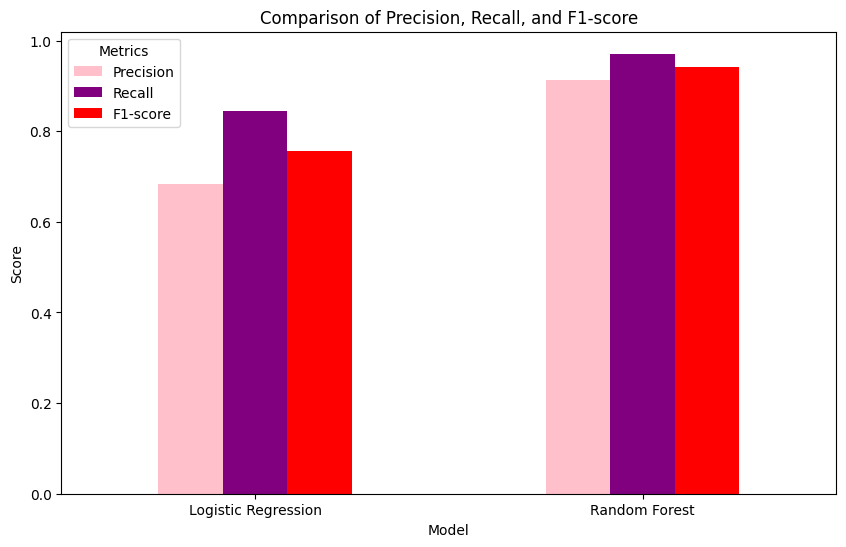

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

# Prepare features and target variable
X = data[['Previous_Drug_Allergies', 'Drug_Composition']]
y = data['Can_take_drug']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)

# Get classification reports
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Extract precision, recall, and F1-score for each class '1' (positive class)
precision_logreg = report_logreg['1']['precision']
recall_logreg = report_logreg['1']['recall']
f1_logreg = report_logreg['1']['f1-score']

precision_rf = report_rf['1']['precision']
recall_rf = report_rf['1']['recall']
f1_rf = report_rf['1']['f1-score']

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Precision': [precision_logreg, precision_rf],
    'Recall': [recall_logreg, recall_rf],
    'F1-score': [f1_logreg, f1_rf]
})
colors=['pink','purple','red']

# Plotting
comparison_df.plot(kind='bar', x='Model', figsize=(10, 6),color=colors)
plt.title('Comparison of Precision, Recall, and F1-score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracies
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Random Forest Accuracy:", accuracy_rf)

# Determine the best model
best_model = 'Logistic Regression' if accuracy_logreg > accuracy_rf else 'Random Forest'
print("Best Model:", best_model)


Logistic Regression Accuracy: 0.7303102625298329
Random Forest Accuracy: 0.9403341288782816
Best Model: Random Forest


<h2>7. Final Selection of the model</h2><br>
Random Forest is often advantageous over Logistic Regression due to its ability to handle non-linear relationships between features and the target variable. Here are a few reasons why Random Forestoutperform Logistic Regression:

1. <b>Non-linearity</b>: Random Forest can capture complex non-linear relationships between features and the target variable more effectively compared to Logistic Regression, which assumes a linear relationship between the features and the log-odds of the target.

2. <b>Feature Importance</b>:Random Forest provides a feature importance score, allowing you to identify which features have the most significant impact on the target variable. This can be beneficial for feature selection and understanding the underlying patterns in the data.

3. <b>Robustness to Outliers</b>: Random Forest is robust to outliers and noisy data due to its ensemble nature. It aggregates predictions from multiple decision trees, reducing the impact of individual outliers on the final prediction.

4. <b>Handling Categorical Variables</b>: Random Forest can handle categorical variables with multiple categories without the need for one-hot encoding or ordinal encoding, making it more convenient to work with datasets containing categorical features.

5. <b>Less Prone to Overfitting</b>:Random Forest builds multiple decision trees on random subsets of the data and combines their predictions, which helps to reduce overfitting compared to Logistic Regression, especially in high-dimensional datasets.

Overall, Random Forest is a versatile and powerful algorithm that can often yield better performance, especially when dealing with complex datasets with non-linear relationships and a large number of features.
